## 라이브러리, 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/hana1/project1/data/test.csv')
df_test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [ ]:
# Check Data Size
print('Test Data Size : ',df_test.shape)

Test Data Size :  (50000, 27)


In [ ]:
df_test.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [ ]:
# Check Train dataset
# 데이터 세트에 누락된 값이 있습니다.
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [ ]:
# 숫자 데이터 유형이 있는 필드의 통계 값 확인
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,42502.0,4182.004291,3174.109304,303.645417,1625.188333,3086.305000,5934.189094,15204.633333
Num_Bank_Accounts,50000.0,16.838260,116.396848,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,50000.0,22.921480,129.314804,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,50000.0,68.772640,451.602363,1.000000,8.000000,13.000000,20.000000,5799.000000
Delay_from_due_date,50000.0,21.052640,14.860397,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,48965.0,30.080200,196.984121,0.000000,4.000000,7.000000,10.000000,2593.000000
Credit_Utilization_Ratio,50000.0,32.279581,5.106238,20.509652,28.061040,32.280390,36.468591,48.540663
Total_EMI_per_month,50000.0,1491.304305,8595.647887,0.000000,32.222388,74.733349,176.157491,82398.000000


In [ ]:
# 숫자 데이터 유형 이외의 필드에 대한 통계 값 확인
df_test.describe(exclude=np.number).T

,count,unique,top,freq
ID,50000,50000,0x160a,1
Customer_ID,50000,12500,CUS_0xd40,4
Month,50000,4,September,12500
Name,44985,10139,Stevex,22
Age,50000,976,39,1493
SSN,50000,12501,#F%$D@*&8,2828
Occupation,50000,16,_______,3438
Annual_Income,50000,16121,109945.32,8
Num_of_Loan,50000,263,2,7173
Type_of_Loan,44296,6260,Not Specified,704


## 함수정리

#### 컬럼 정보

In [ ]:
# 컬럼에 대한 널값,숫자 유니크, 분포
def get_column_details(df,column):
    print("Details of",column,"column")

    # 데이터 타입
    print("\nDataType: ",df[column].dtype)

    # 널 값 존재하는지 확인 여부
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nThere are no null values")
    elif count_null>0:
        print("\nThere are ",count_null," null values")

    # 고유값 개수 확인
    print("\nNumber of Unique Values: ",df[column].nunique())

    # 컬럼 분포 확인
    print("\nDistribution of column:\n")
    print(df[column].value_counts())

### 범주형 변수 clean
### garbage_value = replace_value

In [ ]:
def clean_categorical_field(df, column, replace_value=None):

    # gabage => nan 값 처리 해주기.
    if replace_value!=None:
        df[column] = df[column].replace(replace_value, np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")
    return df

### no

In [ ]:
def replace_nm_no(df, column):
  # replace NM => No
  df[column] = df[column].replace('NM', 'No')

  return df

### nan 채우는 함수

#### 그룹별 최빈값 함수
#### occupation, payment behavior

In [ ]:
# na 값 그룹의 최빈값으로 채우기 => occupation, payment behavior
def fill_missing_with_group_mode(df, groupby, column):
    print("\nNo. of missing values before filling with group mode:",df[column].isnull().sum())

    # Fill with local mode
    mode_per_group = df.groupby(groupby)[column].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else x.median())
    df[column] = df[column].fillna(mode_per_group)
    print(mode_per_group.value_counts())

    print("\nNo. of missing values after filling with group mode:",df[column].isnull().sum())

    return df

#### 그룹별 중앙값

In [ ]:
# na 값 그룹의 중앙값으로 채우기
def fill_missing_with_group_median(df, groupby, column):
    print("\nNo. of missing values before filling with group median:",df[column].isnull().sum())

    # 그룹별 중앙값 구해서 na 중앙값 채우기
    median_per_group = df.groupby(groupby)[column].transform(lambda x: x.median())
    df[column] = df[column].fillna(median_per_group)

    print("\nNo. of missing values after filling with group median:",df[column].isnull().sum())

    return df

### 그래프 그리기

#### _stacked_bar

In [ ]:
# column1 = 현재 열, column2 = 비교열
def plot_stacked_bar(df,column1,column2, rotation=0):

    print(f'\n{column1} & {column2} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    # bar 그려주기
    pd.crosstab(df[column1], df[column2]).plot(kind='bar', stacked=True)

    plt.xlabel(f'{column1}')
    plt.ylabel('Number of Records')
    plt.title(f'{column1} & {column2} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

#### countplot

In [ ]:
def plot_countplot(df, column, rotation=0):

    print(f'\n{column} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    sns.countplot(data=df, x=column)

    plt.xlabel(f'{column}')
    plt.ylabel('Number of Records')
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

#### discount plot

In [ ]:
def plot_displot(df, column, rotation=0, bins=20):
    print(f'\n{column} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    sns.displot(data=df, x=column, kde=True, bins=bins)

    plt.xlabel(f'{column}')
    plt.ylabel('Number of Records')
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

### 숫자형 변수 clean

In [ ]:
def clean_numerical_field(df, column, strip=None, datatype=None, replace_value=None):

    # garbage => nan
    if replace_value!=None:
        df[column] = df[column].replace(replace_value,np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")

    # 숫자 옆 특수문자 지우기
    # 각 요소에서 지정된 문자의 선행 및 후행 항목을 제거 => strip
    if df[column].dtype == object and strip is not None:
        df[column] = df[column].str.strip(strip)
        print(f"\n{strip} are removed")

    # 데이터 타입 변경
    if datatype is not None:
        df[column] = df[column].astype(datatype)
        print(f"\nDatatype of {column} is changed to {datatype}")

    return df


### iqr

#### iqr_drop =  outlier_iqr_drop

In [ ]:
def outlier_iqr_drop(df, groupby, column):
    df_iqr = df.copy()

    mode_by_group = df_iqr.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else x.median())
    df_iqr[column] = df_iqr[column].fillna(mode_by_group)
    print(mode_by_group)


    q25, q75 = np.percentile(df_iqr[column], 25), np.percentile(df_iqr[column], 75)
    print('q25' , q25, 'q75', q75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print(lower, upper)

    df[column] = df[column].apply(lambda x: np.nan if ((x < lower) | (x > upper)) else x)
    print(df[column].value_counts(dropna=False))

    # drop
    df.dropna(subset=[column], inplace=True)
    print(df[column].value_counts(dropna=False))

    return df

#### iqr 대체 = outlier_iqr_fill

In [ ]:
def outlier_iqr_fill(df, groupby, column):
    df_iqr = df.copy()

    mode_by_group = df_iqr.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
    df_iqr[column].fillna(mode_by_group, inplace=True)


    q25, q75 = np.percentile(df_iqr[column], 25), np.percentile(df_iqr[column], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    df[column] = df[column].apply(lambda x: upper if (x > upper) else x)
    df[column] = df[column].apply(lambda x: lower if (x < lower) else x)

    # drop

    return df

### 음수값 처리 함수

In [ ]:
def remove_negatives(df, column):

    #if df[column].dtypes == object:
        # 숫자형으로 바꾸기 + 언더바 없애기(_)
     #   df[column] = pd.to_numeric(df[column].str.replace('_', ''))

    # negative값의 개수
    count_negative = np.sum(df[column] < 0)
    print("\n-----------------------------------------------------")
    print("\nThere are ",count_negative," negative values(Before)")

    # 음수값 제거 -> 0보다 큰 값만 사용
    df = df[df[column] >= 0]

    count_negative = np.sum(df[column] < 0)
    print("\n-----------------------------------------------------")
    print("\nThere are ",count_negative," negative values(After)")

    return df

### month_Converter

In [ ]:
def Month_Converter(df, column):

    def Sub_Month_Converter(val):
        if pd.notnull(val):
            years = int(val.split(' ')[0])
            month = int(val.split(' ')[3])
            return (years*12)+month
        else:
            return val

    df[column] = df[column].apply(lambda x: Sub_Month_Converter(x)).astype(float)

    return df

In [ ]:
## 복사본
df_clean = df_test.copy()

## Categorical Variables

### customer_id

In [ ]:
get_column_details(df_clean,'Customer_ID')

Details of Customer_ID column

DataType:  object

There are no null values

Number of Unique Values:  12500

Distribution of column:

CUS_0xd40     4
CUS_0x9bf4    4
CUS_0x5ae3    4
CUS_0xbe9a    4
CUS_0x4874    4
             ..
CUS_0x2eb4    4
CUS_0x7863    4
CUS_0x9d89    4
CUS_0xc045    4
CUS_0x942c    4
Name: Customer_ID, Length: 12500, dtype: int64


### month

In [ ]:
column_name = 'Month'

# 칼럼 정보
get_column_details(df_clean,column_name)

Details of Month column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

September    12500
October      12500
November     12500
December     12500
Name: Month, dtype: int64


In [ ]:
# 월을 datetime 객체로 변환(1~8) , 데이터 타입 변환
df_clean['Month'] = pd.to_datetime(df_clean.Month, format='%B').dt.month
df_clean['Month']

0         9
1        10
2        11
3        12
4         9
         ..
49995    12
49996     9
49997    10
49998    11
49999    12
Name: Month, Length: 50000, dtype: int64

### occupation
### garbage_value = '_______' => nan
### nan => 그룹화 최빈값

In [ ]:
column_name = 'Occupation'
group_by = 'Customer_ID'
garbage_value = '_______'

get_column_details(df_clean,column_name)

# garbage_value => nan 처리 해줌
df_clean = clean_categorical_field(df_clean, column_name, garbage_value)

# nan 값 그룹화 최빈값 처리
df_clean = fill_missing_with_group_mode(df_clean, group_by, column_name)

Details of Occupation column

DataType:  object

There are no null values

Number of Unique Values:  16

Distribution of column:

_______          3438
Lawyer           3324
Engineer         3212
Architect        3195
Mechanic         3168
Developer        3146
Accountant       3133
Media_Manager    3130
Scientist        3104
Teacher          3103
Entrepreneur     3103
Journalist       3037
Doctor           3027
Manager          3000
Musician         2947
Writer           2933
Name: Occupation, dtype: int64

Garbage value _______ is replaced with np.nan

No. of missing values before filling with group mode: 3438
Lawyer           3548
Engineer         3432
Architect        3412
Mechanic         3388
Scientist        3372
Accountant       3372
Developer        3360
Media_Manager    3360
Teacher          3336
Entrepreneur     3324
Doctor           3284
Journalist       3268
Manager          3216
Musician         3176
Writer           3152
Name: Occupation, dtype: int64

No. of missing val

### credit mix _ drop

In [ ]:
column_name = 'Credit_Mix'
group_by = 'Customer_ID'
garbage_value = '_'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_categorical_field(df_clean,column_name,garbage_value)

df_clean.dropna(subset=['Credit_Mix'], inplace=True)


Details of Credit_Mix column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

Standard    18379
Good        12260
_            9805
Bad          9556
Name: Credit_Mix, dtype: int64

Garbage value _ is replaced with np.nan


### Payment_of_Min_Amount NO

In [ ]:
column_name = 'Payment_of_Min_Amount'

# Get Details
get_column_details(df_clean,column_name)

# Replace NM => No
df_clean = replace_nm_no(df_clean, column_name)

Details of Payment_of_Min_Amount column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Yes    20991
No     14362
NM      4842
Name: Payment_of_Min_Amount, dtype: int64


### Payment Behaviour
### garbage => nan
### customer_id 최빈값

In [ ]:
column_name = 'Payment_Behaviour'
group_by = 'Customer_ID'
garbage_value = '!@9#%8'

df_clean = clean_categorical_field(df_clean, column_name, garbage_value)

# nan 값 그룹화 최빈값 처리
df_clean = fill_missing_with_group_mode(df_clean, group_by, column_name)
df_clean.dropna(subset=[column_name], inplace=True)


Garbage value !@9#%8 is replaced with np.nan

No. of missing values before filling with group mode: 3081


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

High_spent_Large_value_payments     10941
High_spent_Medium_value_payments    10087
Low_spent_Small_value_payments       8504
High_spent_Small_value_payments      4210
Low_spent_Medium_value_payments      3537
Low_spent_Large_value_payments       2884
Name: Payment_Behaviour, dtype: int64

No. of missing values after filling with group mode: 32
(40195, 27)
(40163, 27)


## Numerical Variables
### 후행 및 선행 특수 문자를 제거합니다.
### 필요한 경우 데이터 유형을 객체에서 int/float로 변환합니다.
### Customer_ID로 그룹화할 때 null 값 및 이상값을 모드 값으로 대체

### age
### 1) _ 제거
### 2) iqr
### 3) 음수 확인

Details of Age column

DataType:  object

There are no null values

Number of Unique Values:  800

Distribution of column:

39      1172
44      1161
35      1141
20      1132
37      1129
        ... 
2059       1
1419       1
120        1
2552       1
5826       1
Name: Age, Length: 800, dtype: int64

_ are removed

Datatype of Age is changed to <class 'int'>

Age Distribution


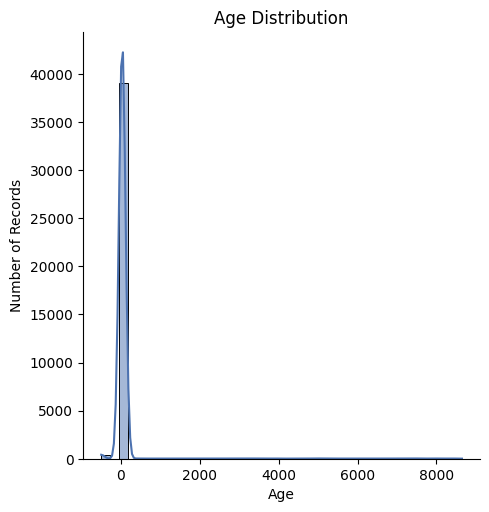

0        24
1        24
2        24
3        24
4        28
         ..
49993    29
49994    29
49996    25
49997    25
49998    25
Name: Age, Length: 40163, dtype: int64
q25 25.0 q75 43.0
-2.0 70.0
39.0    1233
44.0    1217
35.0    1199
32.0    1195
37.0    1187
20.0    1181
22.0    1177
27.0    1168
29.0    1159
25.0    1136
28.0    1132
36.0    1125
41.0    1125
26.0    1120
30.0    1117
24.0    1115
NaN     1114
38.0    1103
42.0    1097
33.0    1097
31.0    1086
19.0    1085
21.0    1069
34.0    1031
45.0    1024
43.0    1015
40.0    1007
23.0    1003
46.0     958
18.0     674
15.0     631
16.0     607
17.0     604
50.0     564
53.0     548
49.0     537
54.0     537
47.0     536
55.0     531
51.0     516
52.0     516
48.0     511
56.0     428
14.0     148
Name: Age, dtype: int64
39.0    1233
44.0    1217
35.0    1199
32.0    1195
37.0    1187
20.0    1181
22.0    1177
27.0    1168
29.0    1159
25.0    1136
28.0    1132
36.0    1125
41.0    1125
26.0    1120
30.0    1117
24.0    11

In [ ]:
column_name = 'Age'
group_by = 'Customer_ID'

get_column_details(df_clean, column_name)

# clean
df_clean = clean_numerical_field(df_clean, column_name, strip='_', datatype=int)

# plot
plot_displot(df_clean,column_name,bins=40)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)
#outlier_iqr_fill(df_train, group_by, column_name)

# remove
df_clean = remove_negatives(df_clean, column_name)

In [ ]:
df_clean.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,9,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,10,Aaron Maashoh,24.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,11,Aaron Maashoh,24.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,12,Aaron Maashoh,24.0,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,9,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


### Annual Income
#### _ 제거
### iqr

In [ ]:
df_clean.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        3923
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       5879
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                4506
Delay_from_due_date            0
Num_of_Delayed_Payment      2753
Changed_Credit_Limit           0
Num_Credit_Inquiries         818
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          3488
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     1792
Payment_Behaviour              0
Monthly_Balance              447
dtype: int64

Details of Annual_Income column

DataType:  object

There are no null values

Number of Unique Values:  15287

Distribution of column:

95596.35      8
17816.75      8
22434.16      7
36585.12      7
72524.2       6
             ..
37754.78_     1
28698.06      1
16822.58      1
118111.08     1
118228.38_    1
Name: Annual_Income, Length: 15287, dtype: int64

_ are removed

Datatype of Annual_Income is changed to <class 'float'>

Annual_Income Distribution


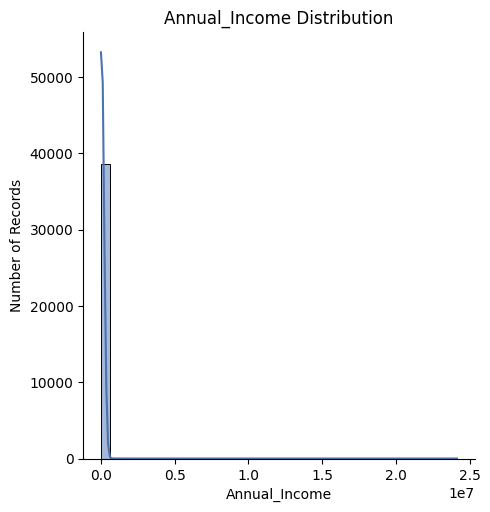

0        19114.12
1        19114.12
2        19114.12
3        19114.12
4        34847.84
           ...   
49993    20002.88
49994    20002.88
49996    39628.99
49997    39628.99
49998    39628.99
Name: Annual_Income, Length: 39049, dtype: float64
q25 19536.45 q75 72904.16
-60515.115000000005 152955.725
NaN          1087
95596.35        8
17816.75        8
36585.12        7
22434.16        7
             ... 
93256.68        1
127464.80       1
123242.36       1
10386.83        1
103838.72       1
Name: Annual_Income, Length: 12205, dtype: int64
95596.35     8
17816.75     8
36585.12     7
22434.16     7
72524.20     6
            ..
16054.06     1
103838.72    1
25744.12     1
31225.44     1
17187.48     1
Name: Annual_Income, Length: 12204, dtype: int64


In [ ]:
column_name = 'Annual_Income'
group_by = 'Customer_ID'

get_column_details(df_clean,column_name)

# Clean
df_clean = clean_numerical_field(df_clean, column_name, strip='_', datatype=float)

plot_displot(df_clean, column_name, bins=40)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)


In [ ]:
df_clean.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,9,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,10,Aaron Maashoh,24.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,11,Aaron Maashoh,24.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,12,Aaron Maashoh,24.0,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,9,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


### Monthly Inhand Salary
#### null 값이 있습니다.
#### 월 소득 급여에 대한 이상치는 없었습니다.
#### 대부분의 고객은 월 소득이 낮습니다. 분포가 오른쪽으로 치우쳐 있습니다.

Details of Monthly_Inhand_Salary column

DataType:  float64

There are  5717  null values

Number of Unique Values:  12271

Distribution of column:

5766.491667    6
6639.560000    6
2295.058333    6
536.431250     6
6082.187500    5
              ..
4996.485000    1
1177.450000    1
3574.256592    1
1592.620000    1
3359.415833    1
Name: Monthly_Inhand_Salary, Length: 12271, dtype: int64

Monthly_Inhand_Salary Distribution


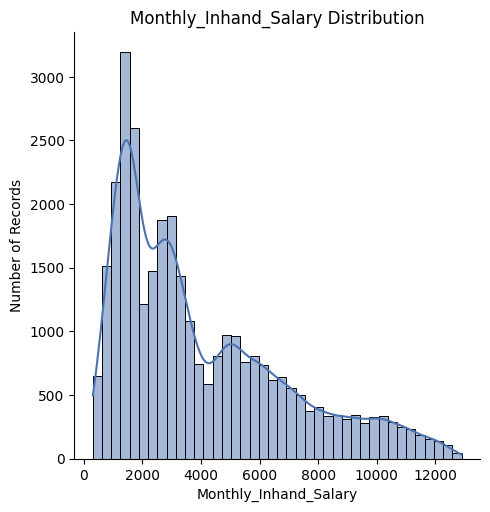


No. of missing values before filling with group median: 5717


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local


No. of missing values after filling with group median: 269


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

0        1824.843333
1        1824.843333
2        1824.843333
3        1824.843333
4        3037.986667
            ...     
49993    1929.906667
49994    1929.906667
49996    3359.415833
49997    3359.415833
49998    3359.415833
Name: Monthly_Inhand_Salary, Length: 37962, dtype: float64
q25 nan q75 nan
nan nan
NaN            269
5766.491667      7
536.431250       7
2295.058333      7
6639.560000      7
              ... 
6200.844737      1
3093.745000      1
1095.569167      1
1353.271667      1
2411.482500      1
Name: Monthly_Inhand_Salary, Length: 12308, dtype: int64
5766.491667    7
536.431250     7
6639.560000    7
2295.058333    7
6769.130000    6
              ..
6200.844737    1
3093.745000    1
1095.569167    1
1353.271667    1
2411.482500    1
Name: Monthly_Inhand_Salary, Length: 12307, dtype: int64


In [ ]:
column_name = 'Monthly_Inhand_Salary'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

plot_displot(df_clean, column_name, bins=40)

# median
df_clean = fill_missing_with_group_median(df_clean, group_by, column_name)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)


### Num Bank Accounts
#### 일부 이상치, 음수 값이 있습니다.
#### 정리 후 이 필드에는 11개의 가능한 값이 있습니다. Num Bank Accounts 범위는 0에서 10입니다.
#### 대부분의 고객은 그렇지 않습니다. 3에서 8 사이의 은행 계좌

Details of Num_Bank_Accounts column

DataType:  int64

There are no null values

Number of Unique Values:  434

Distribution of column:

6       4972
7       4954
8       4833
4       4594
5       4551
        ... 
1661       1
640        1
215        1
1798       1
1727       1
Name: Num_Bank_Accounts, Length: 434, dtype: int64

Num_Bank_Accounts Distribution


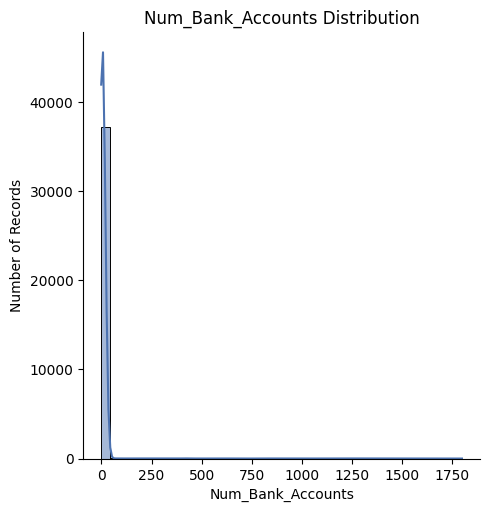

0         3
1         3
2         3
3         3
4         2
         ..
49993    10
49994    10
49996     4
49997     4
49998     4
Name: Num_Bank_Accounts, Length: 37693, dtype: int64
q25 4.0 q75 8.0
-2.0 14.0
 6.0     4972
 7.0     4954
 8.0     4833
 4.0     4594
 5.0     4551
 3.0     4476
 9.0     2090
 10.0    2016
 1.0     1604
 0.0     1578
 2.0     1517
 NaN      481
 11.0      14
-1.0       13
Name: Num_Bank_Accounts, dtype: int64
 6.0     4972
 7.0     4954
 8.0     4833
 4.0     4594
 5.0     4551
 3.0     4476
 9.0     2090
 10.0    2016
 1.0     1604
 0.0     1578
 2.0     1517
 11.0      14
-1.0       13
Name: Num_Bank_Accounts, dtype: int64

-----------------------------------------------------

There are  13  negative values(Before)

-----------------------------------------------------

There are  0  negative values(After)


In [ ]:
column_name = 'Num_Bank_Accounts'
group_by = 'Customer_ID'

# Get Details
get_column_details(df_clean, column_name)

# Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

# remove
df_clean = remove_negatives(df_clean, column_name)


### Num Credit Cards
#### 신용 카드 번호의 고유 값이 1179개이므로 필드에 이상값이 있습니다.
#### 이상값을 제거한 후 신용 카드 수는 0에서 11까지이며 대부분의 고객은 3에서 7 범위의 신용 카드를 가지고 있으며 피크는 5입니다.

Details of Num_Credit_Card column

DataType:  int64

There are no null values

Number of Unique Values:  648

Distribution of column:

5       6805
7       6201
6       6173
4       5267
3       4776
        ... 
285        1
1340       1
726        1
362        1
955        1
Name: Num_Credit_Card, Length: 648, dtype: int64

Num_Credit_Card Distribution


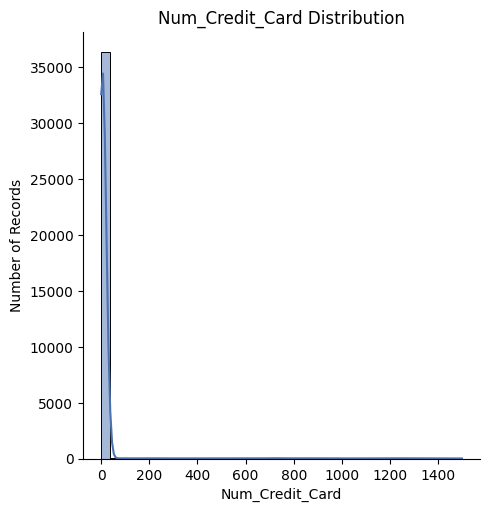

0        4
1        4
2        4
3        4
4        4
        ..
49993    8
49994    8
49996    6
49997    6
49998    6
Name: Num_Credit_Card, Length: 37199, dtype: int64
q25 4.0 q75 7.0
-0.5 11.5
5.0     6805
7.0     6201
6.0     6173
4.0     5267
3.0     4776
8.0     1901
10.0    1833
9.0     1772
NaN      848
2.0      840
1.0      738
11.0      33
0.0       12
Name: Num_Credit_Card, dtype: int64
5.0     6805
7.0     6201
6.0     6173
4.0     5267
3.0     4776
8.0     1901
10.0    1833
9.0     1772
2.0      840
1.0      738
11.0      33
0.0       12
Name: Num_Credit_Card, dtype: int64


In [ ]:
column_name = 'Num_Credit_Card'
group_by = 'Customer_ID'

# Get Details
get_column_details(df_clean,column_name)

# Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)



### Interest Rate
#### 특이치 존재, 정리 후 금리 범위 1% ~ 34%

Details of Interest_Rate column

DataType:  int64

There are no null values

Number of Unique Values:  724

Distribution of column:

5       1831
8       1812
6       1688
12      1638
7       1610
        ... 
4737       1
679        1
247        1
2139       1
4252       1
Name: Interest_Rate, Length: 724, dtype: int64

Interest_Rate Distribution


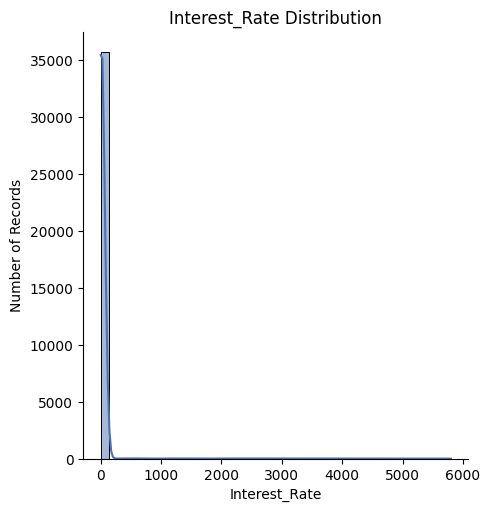

0         3
1         3
2         3
3         3
4         6
         ..
49993    29
49994    29
49996     7
49997     7
49998     7
Name: Interest_Rate, Length: 36351, dtype: int64
q25 8.0 q75 20.0
-10.0 38.0
5.0     1831
8.0     1812
6.0     1688
12.0    1638
7.0     1610
10.0    1597
9.0     1587
11.0    1577
18.0    1520
15.0    1479
20.0    1442
17.0    1411
16.0    1390
19.0    1336
3.0      983
1.0      958
4.0      912
2.0      880
13.0     874
14.0     802
NaN      719
22.0     644
24.0     641
23.0     635
32.0     633
30.0     630
27.0     607
29.0     587
28.0     584
26.0     577
34.0     567
25.0     561
21.0     560
31.0     545
33.0     534
Name: Interest_Rate, dtype: int64
5.0     1831
8.0     1812
6.0     1688
12.0    1638
7.0     1610
10.0    1597
9.0     1587
11.0    1577
18.0    1520
15.0    1479
20.0    1442
17.0    1411
16.0    1390
19.0    1336
3.0      983
1.0      958
4.0      912
2.0      880
13.0     874
14.0     802
22.0     644
24.0     641
23.0     635
32.

In [ ]:
column_name = 'Interest_Rate'
group_by = 'Customer_ID'

# Get Details
get_column_details(df_clean,column_name)

# Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)


### Delay from Due Date
#### 납기일로부터의 지연은 0일에서 30일 사이에 집중되어 있습니다.

Details of Delay_from_due_date column

DataType:  int64

There are no null values

Number of Unique Values:  73

Distribution of column:

 13    1278
 15    1269
 8     1178
 9     1175
 14    1159
       ... 
 65      23
 63      16
-5       14
 66       7
 67       6
Name: Delay_from_due_date, Length: 73, dtype: int64

Delay_from_due_date Distribution


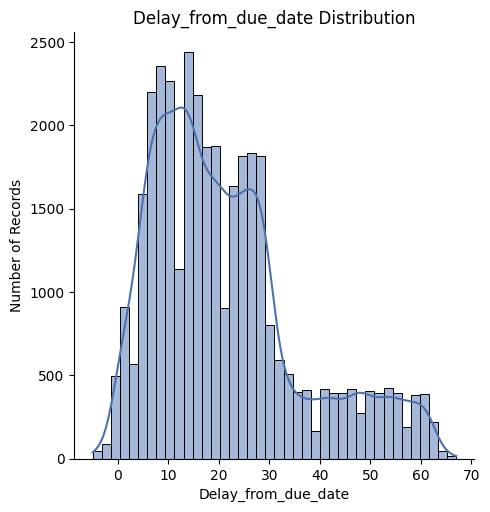

0         3
1         3
2         3
3         3
4         3
         ..
49993    33
49994    33
49996    20
49997    20
49998    20
Name: Delay_from_due_date, Length: 35632, dtype: int64
q25 10.0 q75 28.0
-17.0 55.0
 NaN     1426
 13.0    1278
 15.0    1269
 8.0     1178
 9.0     1175
         ... 
-1.0       72
-2.0       50
-3.0       38
-4.0       33
-5.0       14
Name: Delay_from_due_date, Length: 62, dtype: int64
 13.0    1278
 15.0    1269
 8.0     1178
 9.0     1175
 14.0    1159
         ... 
-1.0       72
-2.0       50
-3.0       38
-4.0       33
-5.0       14
Name: Delay_from_due_date, Length: 61, dtype: int64


In [ ]:
column_name = 'Delay_from_due_date'
group_by = 'Customer_ID'

# Get Details
get_column_details(df_clean,column_name)

# Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

### Number of Delayed Payment

Details of Num_of_Delayed_Payment column

DataType:  object

There are  2402  null values

Number of Unique Values:  328

Distribution of column:

10      1815
19      1795
15      1773
16      1746
18      1739
        ... 
2649       1
1891       1
2999       1
687        1
2034       1
Name: Num_of_Delayed_Payment, Length: 328, dtype: int64

_ are removed

Datatype of Num_of_Delayed_Payment is changed to float

Num_of_Delayed_Payment Distribution


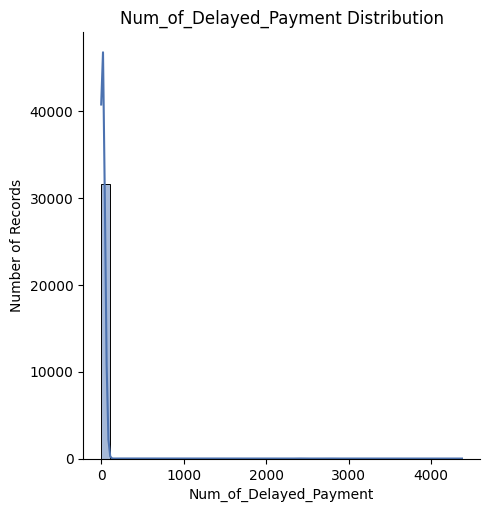

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

0         4.0
1         4.0
2         4.0
3         4.0
4         1.0
         ... 
49993    25.0
49994    25.0
49996     5.0
49997     5.0
49998     5.0
Name: Num_of_Delayed_Payment, Length: 34206, dtype: float64
q25 nan q75 nan
nan nan
NaN       2402
10.0      1869
19.0      1862
15.0      1823
16.0      1807
          ... 
2649.0       1
1891.0       1
2999.0       1
687.0        1
2034.0       1
Name: Num_of_Delayed_Payment, Length: 298, dtype: int64
10.0      1869
19.0      1862
15.0      1823
16.0      1807
17.0      1792
          ... 
2649.0       1
1891.0       1
2999.0       1
687.0        1
2034.0       1
Name: Num_of_Delayed_Payment, Length: 297, dtype: int64

-----------------------------------------------------

There are  196  negative values(Before)

-----------------------------------------------------

There are  0  negative values(After)


In [ ]:
column_name = 'Num_of_Delayed_Payment'
group_by = 'Customer_ID'

# Get Details
get_column_details(df_clean,column_name)

# Cleaning
df_clean = clean_numerical_field(df_clean, column_name, strip='_', datatype='float')

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

# maximum
# *** null값 처리***

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

# remove
df_clean =remove_negatives(df_clean, column_name)

### Changed Credit Limit

Details of Changed_Credit_Limit column

DataType:  object

There are no null values

Number of Unique Values:  3563

Distribution of column:

_                      683
10.06                   45
7.63                    41
11.49                   40
10.64                   39
                      ... 
0.7999999999999998       1
-0.8199999999999998      1
21.67                    1
-0.3899999999999997      1
29.17                    1
Name: Changed_Credit_Limit, Length: 3563, dtype: int64

Garbage value _ is replaced with np.nan

_ are removed

Datatype of Changed_Credit_Limit is changed to float

Changed_Credit_Limit Distribution


<ipython-input-330-ec93fd89e4fd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].replace(replace_value,np.nan)
<ipython-input-330-ec93fd89e4fd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.strip(strip)
<ipython-input-330-ec93fd89e4fd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

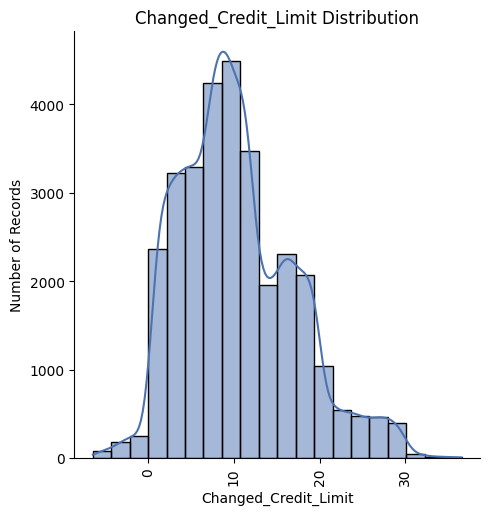

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

0        11.27
1        11.27
2        11.27
3        11.27
4         5.42
         ...  
49992    18.31
49993    18.31
49994    18.31
49997    11.50
49998    11.50
Name: Changed_Credit_Limit, Length: 31608, dtype: float64
q25 nan q75 nan
nan nan
 NaN      683
 10.06     45
 7.63      41
 11.49     40
 10.64     39
         ... 
 0.80       1
-0.82       1
 21.67      1
-0.39       1
 29.17      1
Name: Changed_Credit_Limit, Length: 3563, dtype: int64
 10.06    45
 7.63     41
 11.49    40
 10.64    39
 8.22     38
          ..
 3.79      1
 31.50     1
-4.91      1
 0.66      1
 29.17     1
Name: Changed_Credit_Limit, Length: 3562, dtype: int64


In [ ]:
column_name = 'Changed_Credit_Limit'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

# 마이너스 냅두기

#Cleaning
df_clean = clean_numerical_field(df_clean, column_name, strip='_', datatype='float', replace_value='_')

plot_displot(df_clean, column_name,rotation=90)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

### Number of Credit Inquiries

Details of Num_Credit_Inquiries column

DataType:  float64

There are  653  null values

Number of Unique Values:  500

Distribution of column:

5.0       2963
6.0       2835
4.0       2805
7.0       2666
8.0       2508
          ... 
279.0        1
904.0        1
595.0        1
1326.0       1
840.0        1
Name: Num_Credit_Inquiries, Length: 500, dtype: int64

Num_Credit_Inquiries Distribution


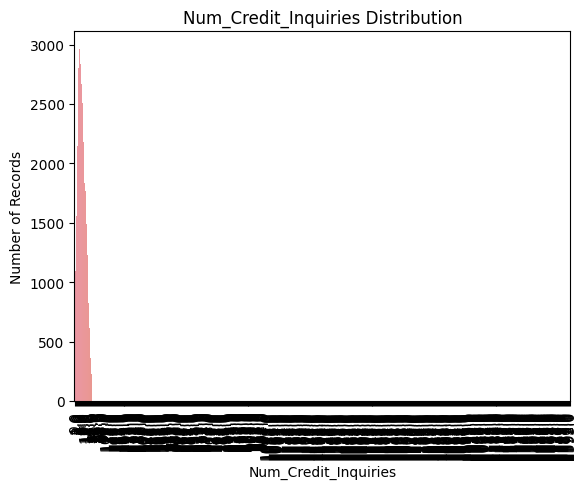


No. of missing values before filling with group median: 653


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local


No. of missing values after filling with group median: 27


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

0         4.0
1         4.0
2         4.0
3         4.0
4         5.0
         ... 
49992    12.0
49993    12.0
49994    12.0
49997     7.0
49998     7.0
Name: Num_Credit_Inquiries, Length: 30925, dtype: float64
q25 nan q75 nan
nan nan
5.0      3018
6.0      2887
4.0      2855
7.0      2724
8.0      2552
         ... 
279.0       1
6.5         1
904.0       1
595.0       1
840.0       1
Name: Num_Credit_Inquiries, Length: 523, dtype: int64
5.0      3018
6.0      2887
4.0      2855
7.0      2724
8.0      2552
         ... 
279.0       1
6.5         1
904.0       1
595.0       1
840.0       1
Name: Num_Credit_Inquiries, Length: 522, dtype: int64


In [ ]:
column_name = 'Num_Credit_Inquiries'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

#Plot Graph
plot_countplot(df_clean,column_name,rotation=90)

# median
df_clean = fill_missing_with_group_median(df_clean, group_by, column_name)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)


### Outstanding Debt

Details of Outstanding_Debt column

DataType:  object

There are no null values

Number of Unique Values:  11556

Distribution of column:

460.46      9
189.33      8
1328.69     8
413.08      8
1109.03     8
           ..
134.94      1
116.3_      1
75.76       1
1011.38     1
2195.84_    1
Name: Outstanding_Debt, Length: 11556, dtype: int64

_ are removed

Datatype of Outstanding_Debt is changed to <class 'float'>

Outstanding_Debt Distribution


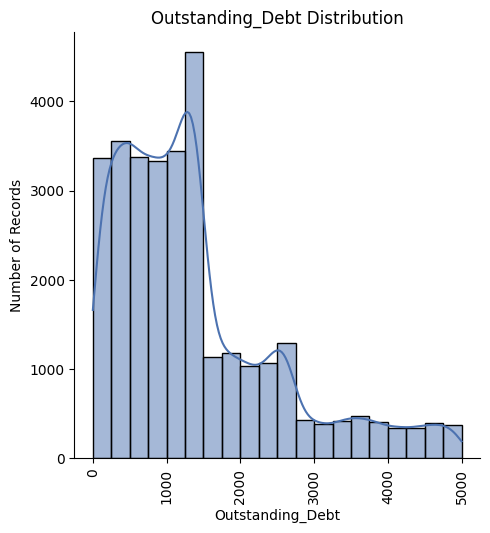

0         809.98
1         809.98
2         809.98
3         809.98
4         605.03
          ...   
49992    3571.70
49993    3571.70
49994    3571.70
49997     502.38
49998     502.38
Name: Outstanding_Debt, Length: 30898, dtype: float64
q25 557.485 q75 1825.94
-1345.1974999999998 3728.6225
NaN        1900
460.46        9
1328.69       8
629.16        8
1254.91       8
           ... 
3609.22       1
440.00        1
1883.89       1
1439.40       1
911.08        1
Name: Outstanding_Debt, Length: 10514, dtype: int64
460.46     9
1328.69    8
1254.91    8
1132.46    8
1109.03    8
          ..
3609.22    1
440.00     1
1883.89    1
1439.40    1
911.08     1
Name: Outstanding_Debt, Length: 10513, dtype: int64


In [ ]:
column_name = 'Outstanding_Debt'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean,column_name,strip='_',datatype=float)

plot_displot(df_clean,column_name,rotation=90)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)


### Credit Utilization Ratio
#### No cleaning is required

Details of Credit_Utilization_Ratio column

DataType:  float64

There are no null values

Number of Unique Values:  28998

Distribution of column:

35.030402    1
35.774077    1
33.943189    1
22.664760    1
25.382697    1
            ..
40.376296    1
35.844211    1
39.851347    1
31.485624    1
39.139840    1
Name: Credit_Utilization_Ratio, Length: 28998, dtype: int64

Credit_Utilization_Ratio Distribution


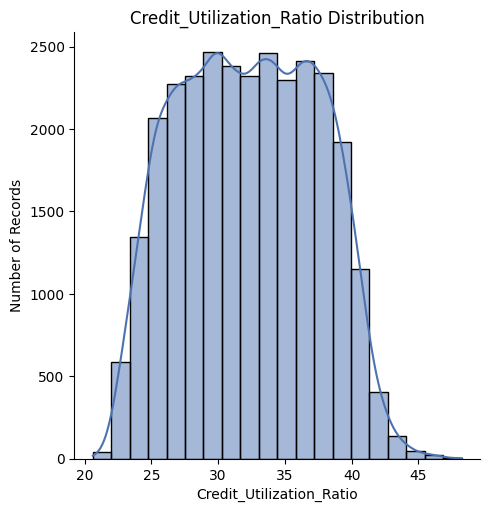

0        32.430559
1        32.430559
2        32.430559
3        32.430559
4        25.926822
           ...    
49992    27.027812
49993    27.027812
49994    27.027812
49997    36.858542
49998    36.858542
Name: Credit_Utilization_Ratio, Length: 28998, dtype: float64
q25 28.08766529600871 q75 36.4772345919304
15.503311352126175 49.06158853581293
35.030402    1
35.774077    1
33.943189    1
22.664760    1
25.382697    1
            ..
40.376296    1
35.844211    1
39.851347    1
31.485624    1
39.139840    1
Name: Credit_Utilization_Ratio, Length: 28998, dtype: int64
35.030402    1
35.774077    1
33.943189    1
22.664760    1
25.382697    1
            ..
40.376296    1
35.844211    1
39.851347    1
31.485624    1
39.139840    1
Name: Credit_Utilization_Ratio, Length: 28998, dtype: int64


In [ ]:
column_name = 'Credit_Utilization_Ratio'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

plot_displot(df_clean,column_name)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)


### Credit History Age

In [ ]:
column_name = 'Credit_History_Age' # nan nan : lower, upper
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

df_clean = Month_Converter(df_clean, column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean,column_name,datatype=float)

# median
df_clean = fill_missing_with_group_median(df_clean, group_by, column_name)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)



Details of Credit_History_Age column

DataType:  object

There are  2571  null values

Number of Unique Values:  399

Distribution of column:

18 Years and 6 Months    170
18 Years and 7 Months    167
20 Years and 1 Months    165
16 Years and 1 Months    164
20 Years and 0 Months    158
                        ... 
3 Years and 2 Months       7
4 Years and 4 Months       6
3 Years and 3 Months       6
0 Years and 10 Months      6
0 Years and 11 Months      3
Name: Credit_History_Age, Length: 399, dtype: int64

Datatype of Credit_History_Age is changed to <class 'float'>

No. of missing values before filling with group median: 2571


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local


No. of missing values after filling with group median: 178


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

0        274.0
1        274.0
2        274.0
3        274.0
4        327.0
         ...  
49992     76.0
49993     76.0
49994     76.0
49997    384.0
49998    384.0
Name: Credit_History_Age, Length: 28998, dtype: float64
q25 nan q75 nan
nan nan
222.0    185
NaN      178
223.0    175
241.0    172
193.0    171
        ... 
291.5      1
382.5      1
177.5      1
284.5      1
159.5      1
Name: Credit_History_Age, Length: 706, dtype: int64
222.0    185
223.0    175
241.0    172
193.0    171
240.0    167
        ... 
291.5      1
382.5      1
177.5      1
284.5      1
159.5      1
Name: Credit_History_Age, Length: 705, dtype: int64


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


### Total EMI per month

Details of Total_EMI_per_month column

DataType:  float64

There are no null values

Number of Unique Values:  10503

Distribution of column:

0.000000        3206
49.574949          4
56.207285          4
303.026936         4
66.259119          4
                ... 
13246.000000       1
55.245667          1
62.222285          1
31925.000000       1
191.415567         1
Name: Total_EMI_per_month, Length: 10503, dtype: int64

Total_EMI_per_month Distribution


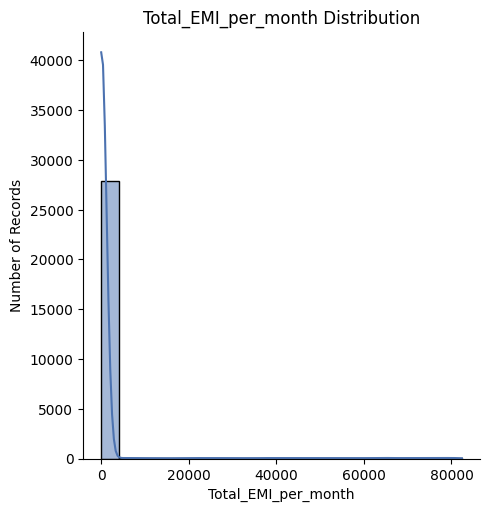

0        49.574949
1        49.574949
2        49.574949
3        49.574949
4        18.816215
           ...    
49992    60.964772
49993    60.964772
49994    60.964772
49997    35.104023
49998    35.104023
Name: Total_EMI_per_month, Length: 28820, dtype: float64
q25 29.604560590172376 q75 167.030738002733
-176.53470552866852 373.1700041215739
0.000000      3206
NaN           2319
49.574949        4
58.517943        4
26.131331        4
              ... 
103.026760       1
38.323346        1
135.562474       1
179.896879       1
97.027900        1
Name: Total_EMI_per_month, Length: 9011, dtype: int64
0.000000      3206
49.574949        4
58.517943        4
26.131331        4
18.666445        4
              ... 
103.026760       1
38.323346        1
135.562474       1
179.896879       1
97.027900        1
Name: Total_EMI_per_month, Length: 9010, dtype: int64


In [ ]:
column_name = 'Total_EMI_per_month'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

#Plot Graph
plot_displot(df_clean, column_name)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)


### Amount Invested Monthly

Details of Amount_invested_monthly column

DataType:  object

There are  1224  null values

Number of Unique Values:  24065

Distribution of column:

__10000__             1162
0.0                     52
236.64268203272135       1
117.83621894076413       1
492.1568352227381        1
                      ... 
56.42670525837189        1
109.43859303082671       1
705.2548057319668        1
533.8695081459275        1
97.59857973344877        1
Name: Amount_invested_monthly, Length: 24065, dtype: int64

_ are removed

Datatype of Amount_invested_monthly is changed to <class 'float'>

Amount_invested_monthly Distribution


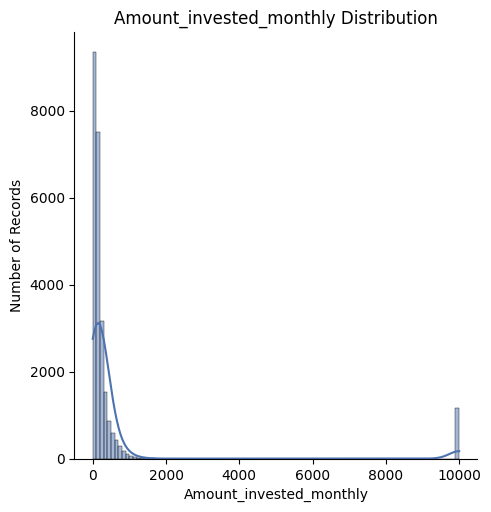


No. of missing values before filling with group median: 1224


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local


No. of missing values after filling with group median: 66


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

0        21.465380
1        21.465380
2        21.465380
3        21.465380
4        39.684018
           ...    
49992    50.846847
49993    50.846847
49994    50.846847
49997    97.598580
49998    97.598580
Name: Amount_invested_monthly, Length: 26501, dtype: float64
q25 nan q75 nan
nan nan
10000.000000    1181
NaN               66
0.000000          52
903.930426         3
146.365134         3
                ... 
110.070374         1
35.056111          1
391.236282         1
100.564142         1
97.598580          1
Name: Amount_invested_monthly, Length: 24598, dtype: int64
10000.000000    1181
0.000000          52
146.365134         3
120.979765         3
65.499384          3
                ... 
110.070374         1
35.056111          1
391.236282         1
100.564142         1
97.598580          1
Name: Amount_invested_monthly, Length: 24597, dtype: int64


In [ ]:
column_name = 'Amount_invested_monthly'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean,column_name,strip='_',datatype=float)

#Plot Graph
plot_displot(df_clean, column_name, bins= 100)

# median
df_clean = fill_missing_with_group_median(df_clean, group_by, column_name)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)


### Monthly Balance

Details of Monthly_Balance column

DataType:  object

There are  203  null values

Number of Unique Values:  26231

Distribution of column:

__-333333333333333333333333333__    2
379.7765095895263                   1
257.3113132792025                   1
524.4710980152008                   1
638.0975169718973                   1
                                   ..
397.95987700698714                  1
473.71503897336936                  1
454.531949924969                    1
245.16487645771932                  1
463.23898098947717                  1
Name: Monthly_Balance, Length: 26231, dtype: int64

Garbage value __-333333333333333333333333333__ is replaced with np.nan

Datatype of Monthly_Balance is changed to <class 'float'>

Monthly_Balance Distribution


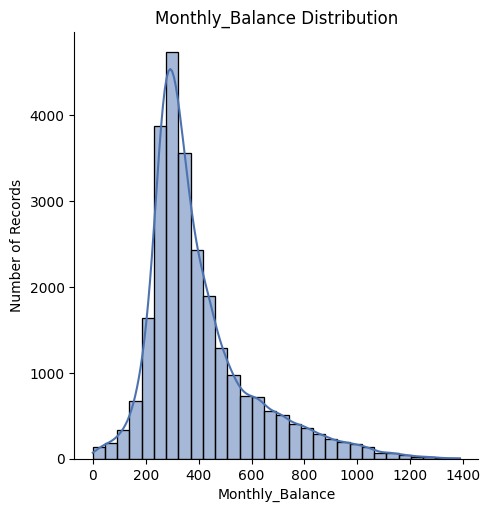


No. of missing values before filling with group median: 205


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local


No. of missing values after filling with group median: 11


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

0        186.266702
1        186.266702
2        186.266702
3        186.266702
4        303.355083
            ...    
49992    314.815153
49993    314.815153
49994    314.815153
49997    349.726332
49998    349.726332
Name: Monthly_Balance, Length: 26435, dtype: float64
q25 nan q75 nan
nan nan
NaN           11
59.423510      4
462.377241     3
243.514666     3
293.630155     3
              ..
507.031622     1
196.212257     1
290.855360     1
543.450458     1
463.238981     1
Name: Monthly_Balance, Length: 26304, dtype: int64
59.423510     4
462.377241    3
243.514666    3
293.630155    3
305.629207    3
             ..
507.031622    1
196.212257    1
290.855360    1
543.450458    1
463.238981    1
Name: Monthly_Balance, Length: 26303, dtype: int64


In [ ]:
column_name = 'Monthly_Balance'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean, column_name)

#Cleaning
df_clean[column_name] = df_clean[column_name].replace('',np.nan)
df_clean = clean_numerical_field(df_clean, column_name, datatype=float, replace_value = '__-333333333333333333333333333__')


# median
df_clean = fill_missing_with_group_median(df_clean, group_by, column_name)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)



### Number of Loan

Details of Num_of_Loan column

DataType:  object

There are no null values

Number of Unique Values:  171

Distribution of column:

2        4186
3        4157
4        3948
0        3040
1        2836
         ... 
876         1
1304        1
569         1
602         1
1296_       1
Name: Num_of_Loan, Length: 171, dtype: int64

_ are removed

Datatype of Num_of_Loan is changed to <class 'float'>

Num_of_Loan Distribution


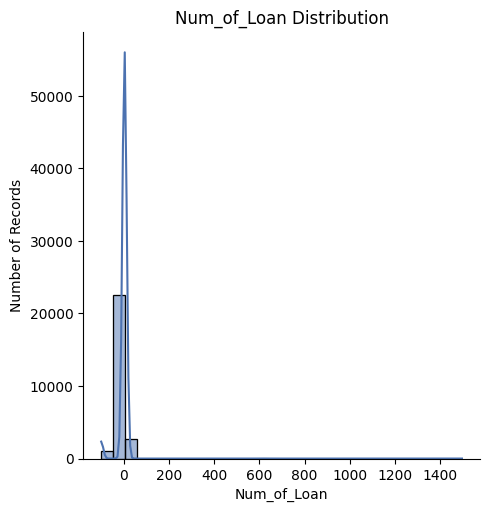

0        4.0
1        4.0
2        4.0
3        4.0
4        1.0
        ... 
49992    5.0
49993    5.0
49994    5.0
49997    2.0
49998    2.0
Name: Num_of_Loan, Length: 26424, dtype: float64
q25 1.0 q75 4.0
-3.5 8.5
2.0    4385
3.0    4382
4.0    4165
0.0    3192
1.0    2995
NaN    1741
6.0    1738
5.0    1686
7.0    1615
8.0     525
Name: Num_of_Loan, dtype: int64
2.0    4385
3.0    4382
4.0    4165
0.0    3192
1.0    2995
6.0    1738
5.0    1686
7.0    1615
8.0     525
Name: Num_of_Loan, dtype: int64

-----------------------------------------------------

There are  0  negative values(Before)

-----------------------------------------------------

There are  0  negative values(After)


In [ ]:
column_name = 'Num_of_Loan'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean, column_name)

# clean
df_clean = clean_numerical_field(df_clean,column_name,strip='_',datatype=float)

# plot
plot_displot(df_clean,column_name,bins=30)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)
#outlier_iqr_fill(df_clean, group_by, column_name)

# remove
df_clean = remove_negatives(df_clean, column_name)


## 데이터 전처리 후 null 값 확인

In [ ]:
# Check if null values are present
df_clean.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        2486
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                3192
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
dtype: int64

In [ ]:
test_outlier_drpo1 = df_clean.to_csv('C:\\Users\\User\\Desktop\\프로젝트1(신용평가)\\Data\\test_outlier_drpo1.csv')

## Data Transformation
### 'ID','Customer_ID','Name','SSN' 제외

In [ ]:
# Drop columns
print("Size of Dataset before dropping columns : ",df_clean.shape)
drop_columns = ['ID','Customer_ID','Name','SSN', 'Type_of_Loan']
df_clean.drop(drop_columns,axis=1,inplace=True)
print("Size of Dataset after dropping columns : ",df_clean.shape)

Size of Dataset before dropping columns :  (24683, 27)
Size of Dataset after dropping columns :  (24683, 22)


### Label Encoding
#### Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score'

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Occupation','Payment_of_Min_Amount','Payment_Behaviour','Credit_Mix']
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for column in categorical_columns:
    df_clean[column] = label_encoder.fit_transform(df_clean[column])

In [ ]:
df_clean.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,9,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,2022.0,1,809.98,35.030402,273.0,0,49.574949,236.642682,5,186.266702
1,10,24.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,4.0,1,809.98,33.053114,274.0,0,49.574949,21.465380,1,361.444004
2,11,24.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,...,4.0,1,809.98,33.811894,274.0,0,49.574949,148.233938,4,264.675446
3,12,24.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,4.0,...,4.0,1,809.98,32.430559,276.0,0,49.574949,39.082511,1,343.826873
4,9,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,...,5.0,1,605.03,25.926822,327.0,0,18.816215,39.684018,0,485.298434


In [ ]:
test_outlier_drpo2 = df_clean.to_csv('C:\\Users\\User\\Desktop\\프로젝트1(신용평가)\\Data\\test_outlier_drpo2.csv')

## 전처리 후 크기 확인

In [ ]:
df_test_1 = pd.read_csv('/content/drive/MyDrive/hana1/project1/data/test_outlier_drpo1.csv')
df_test_2 = pd.read_csv('/content/drive/MyDrive/hana1/project1/data/test_outlier_drpo2.csv')

In [ ]:
df_test_1.shape

(24683, 28)

In [ ]:
df_test_2.shape

(24683, 23)